In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
from keras.models import Sequential

Using TensorFlow backend.


In [7]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [8]:
from keras.utils import to_categorical

In [9]:
from keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
y_train[0]

5

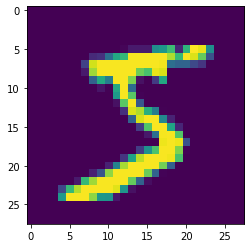

In [13]:
plt.imshow(x_train[0])
plt.show()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
# Reshaping data to fit the model
x_train = x_train.reshape(60000, 28, 28, 1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [21]:
x_train[0].shape

(28, 28, 1)

In [22]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [25]:
x_test.shape

(10000, 28, 28, 1)

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
dummy_y_train = to_categorical(y_train)

In [28]:
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
dummy_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
dummy_y_test = to_categorical(y_test)

In [31]:
dummy_y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [32]:
model = Sequential()

In [33]:
model.add(Convolution2D(64, kernel_size = 3, activation= 'relu', input_shape = (28, 28, 1)))

In [34]:
model.add(MaxPooling2D(pool_size= (3, 2)))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model_train = model.fit(x_train, dummy_y_train, validation_data=(x_test, dummy_y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 60s 996us/step - loss: 0.4916 - accuracy: 0.9456 - val_loss: 0.1013 - val_accuracy: 0.9722
Epoch 2/3
60000/60000 [==============================] - 57s 955us/step - loss: 0.0843 - accuracy: 0.9757 - val_loss: 0.0946 - val_accuracy: 0.9732
Epoch 3/3
60000/60000 [==============================] - 56s 932us/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.0949 - val_accuracy: 0.9748


In [39]:
# To get the history of last train model 
model_train.history

{'val_loss': [0.10125683231737931, 0.09458325461274944, 0.0948641498578596],
 'val_accuracy': [0.9721999764442444, 0.9732000231742859, 0.9747999906539917],
 'loss': [0.4915927196637436, 0.08428914561600735, 0.0725191695124687],
 'accuracy': [0.94558334, 0.97568333, 0.9781167]}

In [40]:
train_accuracy = model_train.history['accuracy']
train_accuracy

[0.94558334, 0.97568333, 0.9781167]

In [41]:
test_accuracy = model_train.history['val_accuracy']
test_accuracy

[0.9721999764442444, 0.9732000231742859, 0.9747999906539917]

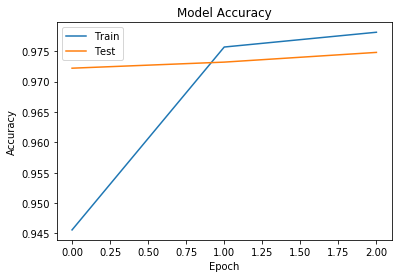

In [42]:
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train", "Test"], loc= 'upper left')
plt.show()

In [44]:
# Predicting the first 10 results
prediction = model.predict(x_test[:10])

In [45]:
prediction

array([[9.13999779e-12, 9.83640795e-13, 1.11932108e-09, 1.23787788e-06,
        2.39993538e-14, 5.57549102e-12, 1.55968444e-15, 9.99998808e-01,
        7.71169018e-10, 5.60542990e-09],
       [1.79437976e-07, 1.80800507e-05, 9.99976754e-01, 1.72826753e-10,
        4.07774409e-15, 5.49718561e-12, 4.97465589e-06, 2.14054577e-14,
        2.56335753e-08, 6.51696904e-13],
       [1.23513928e-08, 9.99880314e-01, 1.09199960e-09, 1.56991933e-10,
        1.59236643e-05, 2.85496526e-07, 4.56151419e-08, 6.10636430e-09,
        1.03412174e-04, 4.09059204e-08],
       [9.99978662e-01, 8.49535053e-10, 6.13139690e-08, 8.23789925e-11,
        2.60716693e-09, 6.06562711e-09, 2.10575417e-05, 8.10959855e-10,
        1.06800195e-08, 8.39644940e-08],
       [9.14016150e-13, 2.85226889e-15, 4.00289480e-12, 1.56345943e-12,
        1.00000000e+00, 3.20903243e-12, 1.38056342e-13, 1.34512635e-11,
        3.62186969e-09, 6.38624353e-09],
       [1.07702810e-07, 9.99406815e-01, 3.23555831e-08, 8.21383739e-10,
   

In [46]:
# In prediction index with highest value(accuracy) is the actual predicted value 

In [47]:
# Printing the actual Predicted values
# argmax is used to get the index with highest value from each array
np.argmax(prediction, axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [48]:
x_test[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [49]:
np.array(x_test[0])

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [50]:
np.array(x_test[0].reshape(28, 28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

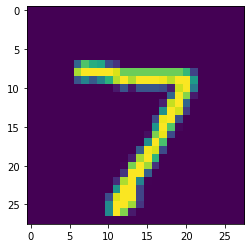

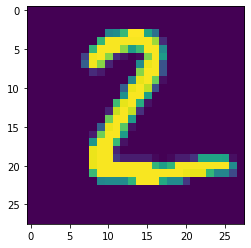

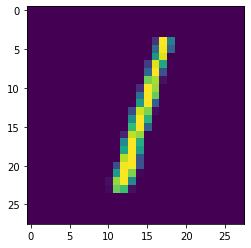

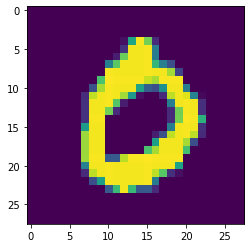

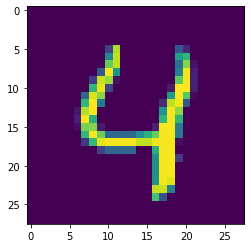

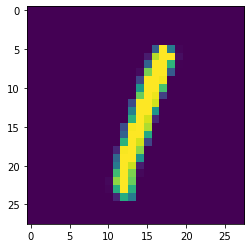

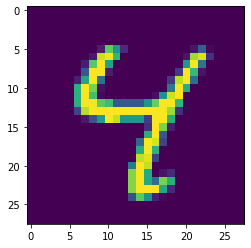

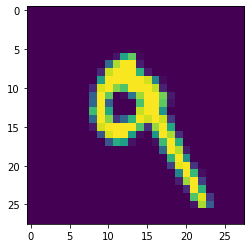

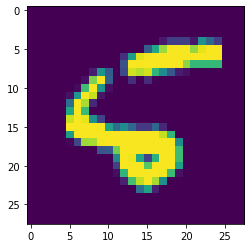

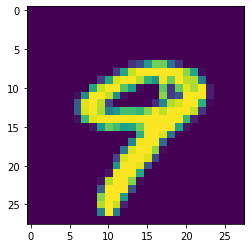

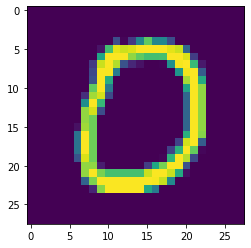

In [51]:
for i in range(0, 11):
# Looped from each image or index(28, 28)    
    image = x_test[i]
    pixel = image.reshape((28, 28))
    plt.imshow(pixel)
    plt.show()